In [ ]:
#Linear Regression models the relationship between the dependent variable (y)
#and one or more independent variables (x) by fitting a linear equation to observed data.
#In simple terms, it finds the best-fitting straight line through the data points

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [ ]:
#Read the data
#here loding the data from sklearn
from sklearn.datasets import load_diabetes

In [ ]:
diabetes = load_diabetes()

In [ ]:
diabetes

{'data': array([[ 0.03807591,  0.05068012,  0.06169621, ..., -0.00259226,
          0.01990749, -0.01764613],
        [-0.00188202, -0.04464164, -0.05147406, ..., -0.03949338,
         -0.06833155, -0.09220405],
        [ 0.08529891,  0.05068012,  0.04445121, ..., -0.00259226,
          0.00286131, -0.02593034],
        ...,
        [ 0.04170844,  0.05068012, -0.01590626, ..., -0.01107952,
         -0.04688253,  0.01549073],
        [-0.04547248, -0.04464164,  0.03906215, ...,  0.02655962,
          0.04452873, -0.02593034],
        [-0.04547248, -0.04464164, -0.0730303 , ..., -0.03949338,
         -0.00422151,  0.00306441]]),
 'target': array([151.,  75., 141., 206., 135.,  97., 138.,  63., 110., 310., 101.,
         69., 179., 185., 118., 171., 166., 144.,  97., 168.,  68.,  49.,
         68., 245., 184., 202., 137.,  85., 131., 283., 129.,  59., 341.,
         87.,  65., 102., 265., 276., 252.,  90., 100.,  55.,  61.,  92.,
        259.,  53., 190., 142.,  75., 142., 155., 225.,  59

In [ ]:
print(diabetes.DESCR)

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - age     age in years
      - sex
      - bmi     body mass index
      - bp      average blood pressure
      - s1      tc, total serum cholesterol
      - s2      ldl, low-density lipoproteins
      - s3      hdl, high-density lipoproteins
      - s4      tch, total cholesterol / HDL
      - s5      ltg, possibly log of serum triglycerides level
      - s6      glu, blood sugar level

Note: Each of these 1

In [ ]:
#Probleam statement >> to predicet measure of disease progression one year after baseline given 10 baseline feature.

In [ ]:
diabetes.data

array([[ 0.03807591,  0.05068012,  0.06169621, ..., -0.00259226,
         0.01990749, -0.01764613],
       [-0.00188202, -0.04464164, -0.05147406, ..., -0.03949338,
        -0.06833155, -0.09220405],
       [ 0.08529891,  0.05068012,  0.04445121, ..., -0.00259226,
         0.00286131, -0.02593034],
       ...,
       [ 0.04170844,  0.05068012, -0.01590626, ..., -0.01107952,
        -0.04688253,  0.01549073],
       [-0.04547248, -0.04464164,  0.03906215, ...,  0.02655962,
         0.04452873, -0.02593034],
       [-0.04547248, -0.04464164, -0.0730303 , ..., -0.03949338,
        -0.00422151,  0.00306441]])

In [ ]:
diabetes

{'data': array([[ 0.03807591,  0.05068012,  0.06169621, ..., -0.00259226,
          0.01990749, -0.01764613],
        [-0.00188202, -0.04464164, -0.05147406, ..., -0.03949338,
         -0.06833155, -0.09220405],
        [ 0.08529891,  0.05068012,  0.04445121, ..., -0.00259226,
          0.00286131, -0.02593034],
        ...,
        [ 0.04170844,  0.05068012, -0.01590626, ..., -0.01107952,
         -0.04688253,  0.01549073],
        [-0.04547248, -0.04464164,  0.03906215, ...,  0.02655962,
          0.04452873, -0.02593034],
        [-0.04547248, -0.04464164, -0.0730303 , ..., -0.03949338,
         -0.00422151,  0.00306441]]),
 'target': array([151.,  75., 141., 206., 135.,  97., 138.,  63., 110., 310., 101.,
         69., 179., 185., 118., 171., 166., 144.,  97., 168.,  68.,  49.,
         68., 245., 184., 202., 137.,  85., 131., 283., 129.,  59., 341.,
         87.,  65., 102., 265., 276., 252.,  90., 100.,  55.,  61.,  92.,
        259.,  53., 190., 142.,  75., 142., 155., 225.,  59

In [ ]:
diabetes.target

array([151.,  75., 141., 206., 135.,  97., 138.,  63., 110., 310., 101.,
        69., 179., 185., 118., 171., 166., 144.,  97., 168.,  68.,  49.,
        68., 245., 184., 202., 137.,  85., 131., 283., 129.,  59., 341.,
        87.,  65., 102., 265., 276., 252.,  90., 100.,  55.,  61.,  92.,
       259.,  53., 190., 142.,  75., 142., 155., 225.,  59., 104., 182.,
       128.,  52.,  37., 170., 170.,  61., 144.,  52., 128.,  71., 163.,
       150.,  97., 160., 178.,  48., 270., 202., 111.,  85.,  42., 170.,
       200., 252., 113., 143.,  51.,  52., 210.,  65., 141.,  55., 134.,
        42., 111.,  98., 164.,  48.,  96.,  90., 162., 150., 279.,  92.,
        83., 128., 102., 302., 198.,  95.,  53., 134., 144., 232.,  81.,
       104.,  59., 246., 297., 258., 229., 275., 281., 179., 200., 200.,
       173., 180.,  84., 121., 161.,  99., 109., 115., 268., 274., 158.,
       107.,  83., 103., 272.,  85., 280., 336., 281., 118., 317., 235.,
        60., 174., 259., 178., 128.,  96., 126., 28

In [ ]:
diabetes.feature_names

['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']

In [ ]:
data = pd.DataFrame(diabetes.data, columns = diabetes.feature_names)   #Created a Data.

In [ ]:
data

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641
...,...,...,...,...,...,...,...,...,...,...
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018114,0.044485
439,0.041708,0.050680,-0.015906,0.017293,-0.037344,-0.013840,-0.024993,-0.011080,-0.046883,0.015491
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044529,-0.025930


In [ ]:
data['target'] = diabetes.target

In [ ]:
data

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0
...,...,...,...,...,...,...,...,...,...,...,...
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207,178.0
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018114,0.044485,104.0
439,0.041708,0.050680,-0.015906,0.017293,-0.037344,-0.013840,-0.024993,-0.011080,-0.046883,0.015491,132.0
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044529,-0.025930,220.0


In [ ]:
#EDA , DATACLEANING , DATA PREPARATION, FEATURE ENGINEERING

In [ ]:
#DIVIVE THE DATA INTO X, Y , for simple linear regression we take only one feature.

X = data[["bmi"]]
y = data["target"]

In [ ]:
X

,bmi
0,0.061696
1,-0.051474
2,0.044451
3,-0.011595
4,-0.036385
...,...
437,0.019662
438,-0.015906
439,-0.015906
440,0.039062


In [ ]:
y

0      151.0
1       75.0
2      141.0
3      206.0
4      135.0
       ...  
437    178.0
438    104.0
439    132.0
440    220.0
441     57.0
Name: target, Length: 442, dtype: float64

In [ ]:
#split the data into train - test
from sklearn.model_selection import train_test_split

In [ ]:
train_test_split(X,y)

[          bmi
 261 -0.041774
 27   0.059541
 64  -0.025607
 380  0.026128
 357  0.049840
 ..        ...
 287 -0.006206
 413 -0.000817
 319  0.004572
 426 -0.034229
 255 -0.065486
 
 [331 rows x 1 columns],
           bmi
 160 -0.062252
 116  0.058463
 372 -0.023451
 271  0.008883
 15  -0.018062
 ..        ...
 188 -0.002973
 338 -0.033151
 110 -0.032073
 60  -0.004050
 135  0.056307
 
 [111 rows x 1 columns],
 261    103.0
 27      85.0
 64      71.0
 380     52.0
 357    221.0
        ...  
 287    219.0
 413    113.0
 319    191.0
 426    120.0
 255    153.0
 Name: target, Length: 331, dtype: float64,
 160     53.0
 116    275.0
 372     71.0
 271    127.0
 15     171.0
        ...  
 188    141.0
 338    214.0
 110    104.0
 60      61.0
 135    272.0
 Name: target, Length: 111, dtype: float64]

In [ ]:
train_test_split(X,y, test_size = 0.2, random_state = 1)

[          bmi
 438 -0.015906
 232  0.000261
 80   0.012117
 46  -0.011595
 381 -0.089197
 ..        ...
 255 -0.065486
 72  -0.004050
 396 -0.030996
 235 -0.014828
 37   0.011039
 
 [353 rows x 1 columns],
           bmi
 246 -0.032073
 425 -0.040696
 293  0.092953
 31  -0.065486
 359  0.005650
 ..        ...
 277 -0.059019
 132 -0.021295
 213 -0.070875
 286 -0.054707
 256  0.160855
 
 [89 rows x 1 columns],
 438    104.0
 232    259.0
 80     143.0
 46     190.0
 381    104.0
        ...  
 255    153.0
 72     202.0
 396     43.0
 235    124.0
 37     276.0
 Name: target, Length: 353, dtype: float64,
 246     78.0
 425    152.0
 293    200.0
 31      59.0
 359    311.0
        ...  
 277     64.0
 132    107.0
 213     49.0
 286     60.0
 256    346.0
 Name: target, Length: 89, dtype: float64]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 1)

In [ ]:
X_train

,bmi
438,-0.015906
232,0.000261
80,0.012117
46,-0.011595
381,-0.089197
...,...
255,-0.065486
72,-0.004050
396,-0.030996
235,-0.014828


In [ ]:
X_train.shape

(353, 1)

In [ ]:
X_test

,bmi
246,-0.032073
425,-0.040696
293,0.092953
31,-0.065486
359,0.005650
...,...
277,-0.059019
132,-0.021295
213,-0.070875
286,-0.054707


In [ ]:
X_test.shape

(89, 1)

In [ ]:
data.shape

(442, 11)

In [ ]:
y_train

438    104.0
232    259.0
80     143.0
46     190.0
381    104.0
       ...  
255    153.0
72     202.0
396     43.0
235    124.0
37     276.0
Name: target, Length: 353, dtype: float64

In [ ]:
y_test

246     78.0
425    152.0
293    200.0
31      59.0
359    311.0
       ...  
277     64.0
132    107.0
213     49.0
286     60.0
256    346.0
Name: target, Length: 89, dtype: float64

In [ ]:
y_train.shape

(353,)

In [ ]:
y_test.shape

(89,)

In [ ]:
data.shape

(442, 11)

In [ ]:
#Scaling (optional)

In [ ]:
# Model Training

from sklearn.linear_model import LinearRegression

In [ ]:
#instance an LinerRegression model

model = LinearRegression()

In [ ]:
model

LinearRegression()

In [ ]:
#training of model

model.fit(X_train, y_train)     #at backend, it will use gradient desent to give optimal coefficient  (coef).

LinearRegression()

In [ ]:
model.coef_             #coef.

array([977.74040067])

In [ ]:
model.intercept_        #intercept.

151.66780594915235

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
y_pred

array([120.30830405, 111.87774078, 242.55147149,  87.63987137,
       157.19201836, 170.89168368, 226.74416536, 136.11561019,
       129.79268773, 116.09302241, 189.86045104, 131.90032855,
       121.36212446, 152.97673673, 194.07573268, 215.15214086,
       148.76145509, 119.25448364, 127.68504691, 162.46112041,
       155.08437755, 100.28571628, 141.38471223, 111.87774078,
        90.8013326 , 196.1833735 , 129.79268773, 190.91427145,
       113.9853816 , 163.51494082, 145.59999387, 150.86909591,
       205.66775718, 119.25448364,  95.01661424, 167.73022245,
        80.26312851, 210.93685922, 190.91427145, 127.68504691,
       161.4073    , 145.59999387, 121.36212446, 138.223251  ,
       132.95414896, 102.3933571 , 179.32224695, 113.9853816 ,
       209.88303881, 131.90032855, 144.54617346, 200.39865513,
       107.66245914, 105.55481833, 174.05314491, 137.16943059,
       158.24583877, 121.36212446,  83.42458974, 126.6312265 ,
       122.41594487, 227.79798576, 161.4073    , 131.90

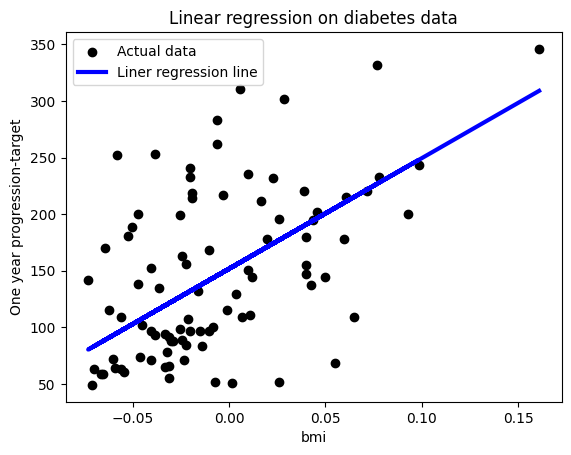

In [ ]:
#Visualise the result

plt.scatter(X_test, y_test, color = 'black', label = 'Actual data')
plt.plot(X_test, y_pred, color = 'blue', linewidth = 3, label = 'Liner regression line')
plt.xlabel('bmi')
plt.ylabel('One year progression-target')
plt.title('Linear regression on diabetes data')
plt.legend()
plt.show()

In [ ]:
from sklearn.metrics import mean_squared_error

In [ ]:
mean_squared_error(y_test, y_pred)

3989.8289727609313